##### 1. Import Libraries and Datasets

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import openpyxl

In [2]:
# Import datasets
df = pd.read_excel("./data/MediaReportExcel.csv", na_values=["", " ", "NA", "na"]) # Amend file path as required
print("SGH Media Reports dataset dimensions are:", df.shape)
df.head(3)

SGH Media Reports dataset dimensions are: (101, 4)


,Article,Summary,Title,Url
0,​SINGAPORE - A prescription for innovative hea...,A five-year Memorandum Of Understanding (MOU) ...,"SingHealth, SIT sign agreement to team up to p...",https://www.singhealth.com.sg/news/tomorrows-m...
1,SINGAPORE - Diagnosed with severe asthma four ...,People riddled with severe asthma are set to b...,Data registry set up to help Singapore patient...,https://www.singhealth.com.sg/news/tomorrows-m...
2,Mention chimeric antigen receptor (CAR) T-cell...,"Dr Francesa Lorraine Lim, Senior Consultant, D...",SGH doctor on types of blood cancers and CAR-T...,https://www.singhealth.com.sg/news/singapore-h...


##### 2. Duplicates removal and NULL value checks

<AxesSubplot:>

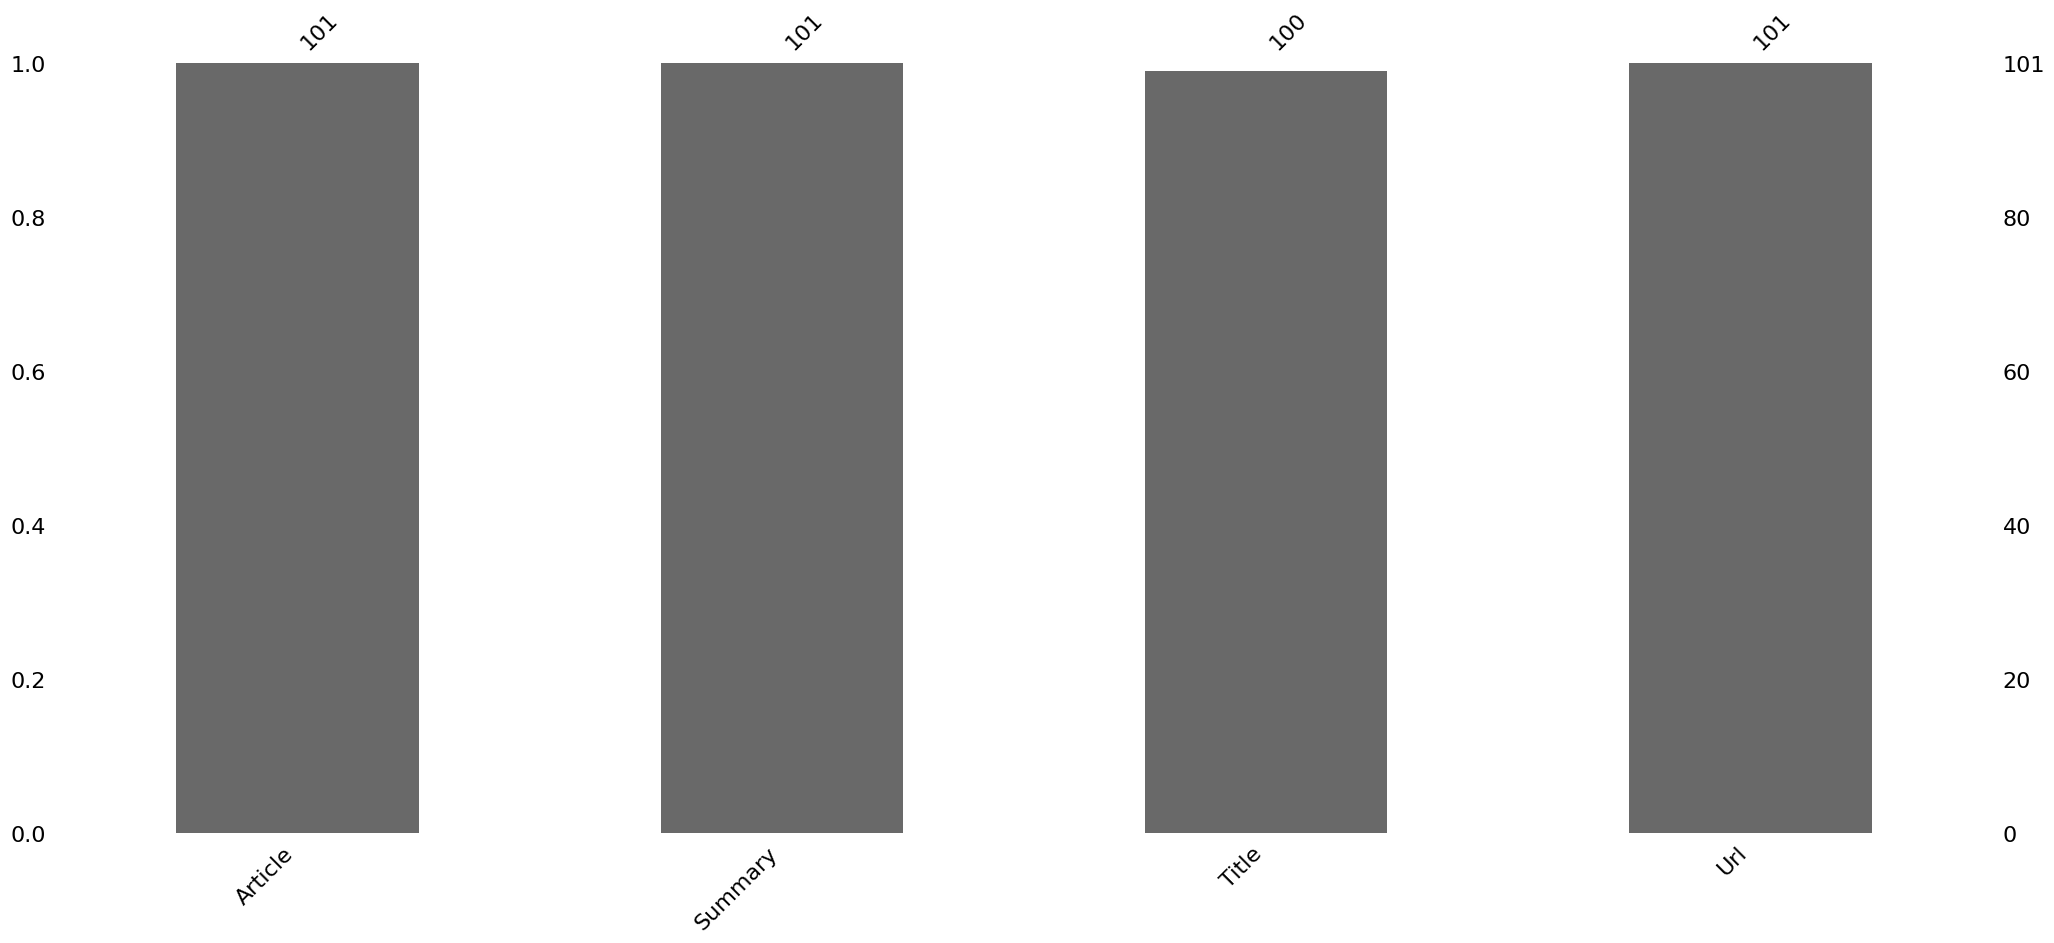

In [3]:
# Remove duplicates
df = df.drop_duplicates()

# Drop NAs
import missingno as msno
msno.bar(df)

In [4]:
# Visualise the character length of the article and summary bodies
df["article_length"] = df["Article"].apply(lambda x: len(x))
df["summary_length"] = df["Summary"].apply(lambda x: len(x))
df.head(3)

,Article,Summary,Title,Url,article_length,summary_length
0,​SINGAPORE - A prescription for innovative hea...,A five-year Memorandum Of Understanding (MOU) ...,"SingHealth, SIT sign agreement to team up to p...",https://www.singhealth.com.sg/news/tomorrows-m...,2319,1212
1,SINGAPORE - Diagnosed with severe asthma four ...,People riddled with severe asthma are set to b...,Data registry set up to help Singapore patient...,https://www.singhealth.com.sg/news/tomorrows-m...,3115,942
2,Mention chimeric antigen receptor (CAR) T-cell...,"Dr Francesa Lorraine Lim, Senior Consultant, D...",SGH doctor on types of blood cancers and CAR-T...,https://www.singhealth.com.sg/news/singapore-h...,4741,643


##### 3. EDA

count      101.000000
mean      4096.346535
std       2713.126538
min        386.000000
25%       2220.000000
50%       3337.000000
75%       5375.000000
max      14473.000000
Name: article_length, dtype: float64


<AxesSubplot:xlabel='article_length', ylabel='Count'>

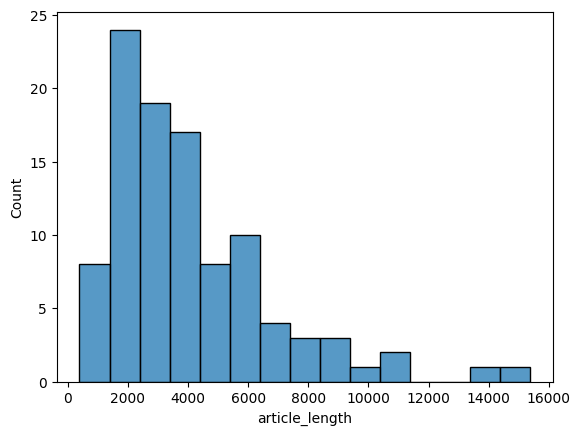

In [5]:
# Check data spread of media article lengths
import seaborn as sns

print(df["article_length"].describe())
sns.histplot(data=df, x="article_length", binwidth=1000)

count     101.000000
mean      860.178218
std       372.513608
min       283.000000
25%       567.000000
50%       795.000000
75%      1169.000000
max      1957.000000
Name: summary_length, dtype: float64


<AxesSubplot:xlabel='summary_length', ylabel='Count'>

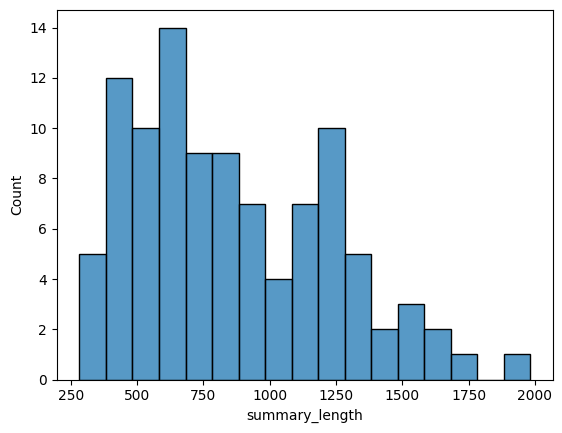

In [6]:
# Check data spread of media summary lengths
print(df["summary_length"].describe())
sns.histplot(data=df, x="summary_length", binwidth=100)

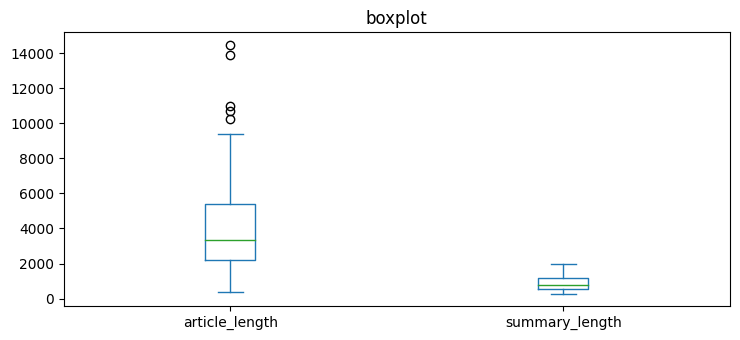

In [7]:
# Visualize boxplots of data distribution

import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df[['article_length', 'summary_length']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [8]:
import numpy as np

# First quartile (Q1)
ArtLenQ1 = np.quantile(df['article_length'], 0.25)

# Median (Q2)
ArtLenQ2 = np.quantile(df['article_length'], 0.5)
  
# Third quartile (Q3)
ArtLenQ3 = np.quantile(df['article_length'], 0.75)

# Fourth quartile (Q3)
ArtLenQ4 = np.quantile(df['article_length'], 1.00)
  
# Interquaritle range (IQR)
ArtLenIQR = ArtLenQ3 - ArtLenQ1

ArtLen_lower_range = ArtLenQ1 - 1.5 * ArtLenIQR
ArtLen_upper_range = ArtLenQ3 + 1.5 * ArtLenIQR
ArtLen_outlier_free_list = [x for x in df['article_length'] if ((x > ArtLen_lower_range) & (x < ArtLen_upper_range))]
df = df.loc[df['article_length'].isin(ArtLen_outlier_free_list)]

print("Article Length Q1:", ArtLenQ1, "characters" )
print("Article Length Q2:", ArtLenQ2, "characters" )
print("Article Length Q3:", ArtLenQ3, "characters" )
print("Article Length Q4:", ArtLenQ4, "characters" )
print("Article Length Lower Range:", ArtLen_lower_range, "characters")
print("Article Length Upper Range:", ArtLen_upper_range, "characters")

# First quartile (Q1)
SumLenQ1 = np.quantile(df['summary_length'], 0.25)

# Median (Q2)

SumLenQ2 = np.quantile(df['summary_length'], 0.5)
  
# Third quartile (Q3)
SumLenQ3 = np.quantile(df['summary_length'], 0.75)

# Fourth quartile (Q3)
SumLenQ4 = np.quantile(df['summary_length'], 1.00)
  
# Interquaritle range (IQR)
SumLenIQR = SumLenQ3 - SumLenQ1

SumLen_lower_range = SumLenQ1 - 1.5 * SumLenIQR
SumLen_upper_range = SumLenQ3 + 1.5 * SumLenIQR
SumLen_outlier_free_list = [x for x in df['summary_length'] if ((x > SumLen_lower_range) & (x < SumLen_upper_range))]
df = df.loc[df['summary_length'].isin(SumLen_outlier_free_list)]

print("Summary Length Q1:", SumLenQ1, "characters" )
print("Summary Length Q2:", SumLenQ2, "characters" )
print("Summary Length Q3:", SumLenQ3, "characters" )
print("Summary Length Q4:", SumLenQ4, "characters" )
print("Summary Length Lower Range:", SumLen_lower_range, "characters")
print("Summary Length Upper Range:", SumLen_upper_range, "characters")

Article Length Q1: 2220.0 characters
Article Length Q2: 3337.0 characters
Article Length Q3: 5375.0 characters
Article Length Q4: 14473.0 characters
Article Length Lower Range: -2512.5 characters
Article Length Upper Range: 10107.5 characters
Summary Length Q1: 574.5 characters
Summary Length Q2: 785.0 characters
Summary Length Q3: 1182.25 characters
Summary Length Q4: 1957.0 characters
Summary Length Lower Range: -337.125 characters
Summary Length Upper Range: 2093.875 characters
